In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


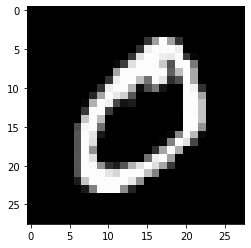

In [ ]:
# pick a sample to plot
sample = 1
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
x_train[sample].shape

(28, 28)

In [ ]:
clf=models.Sequential()

clf.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
clf.add(layers.MaxPool2D())

clf.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
clf.add(layers.MaxPool2D())

clf.add(layers.Flatten())

clf.add(layers.Dense(128,activation='relu'))
clf.add(layers.Dropout(0.1))

clf.add(layers.Dense(64,activation='relu'))
clf.add(layers.Dropout(0.1))

clf.add(layers.Dense(10,activation='softmax'))

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train/255
x_test=x_test/255

In [ ]:
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
import numpy as np

y=y_test
y_train = tf.one_hot(y_train, depth=10).numpy() 
y_test = tf.one_hot(y_test, depth=10).numpy() 

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)
[0. 1.]


In [ ]:
clf.fit(x_train,y_train,batch_size=600,epochs=10,validation_data=(x_test,y_test),validation_batch_size=50)

Epoch 1/10
100/100 [==============================] - 3s 34ms/step - loss: 0.5605 - accuracy: 0.8253 - val_loss: 0.1155 - val_accuracy: 0.9644
Epoch 2/10
100/100 [==============================] - 3s 32ms/step - loss: 0.1186 - accuracy: 0.9638 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 3/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0761 - accuracy: 0.9780 - val_loss: 0.0432 - val_accuracy: 0.9850
Epoch 4/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.0437 - val_accuracy: 0.9849
Epoch 5/10
100/100 [==============================] - 3s 31ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 6/10
100/100 [==============================] - 3s 31ms/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0285 - val_accuracy: 0.9902
Epoch 7/10
100/100 [==============================] - 3s 31ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0316 - val_accuracy: 0.9892

In [ ]:
y_pred=np.argmax(clf.predict(x_test), axis=-1)
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm(y,y_pred)


array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1131,    1,    2,    0,    0,    1,    0,    0,    0],
       [   2,    1, 1021,    1,    1,    0,    0,    2,    4,    0],
       [   0,    0,    0, 1002,    0,    2,    0,    1,    4,    1],
       [   0,    0,    0,    0,  976,    0,    1,    0,    0,    5],
       [   2,    0,    0,    4,    0,  883,    1,    1,    1,    0],
       [   5,    2,    0,    0,    2,    4,  942,    0,    3,    0],
       [   0,    3,    6,    1,    0,    0,    0, 1014,    2,    2],
       [   4,    0,    1,    0,    0,    1,    0,    0,  967,    1],
       [   0,    3,    0,    0,    7,    3,    0,    2,    4,  990]])

In [ ]:
from skimage.transform import resize
import numpy as np 
from skimage import io, color
img1 = io.imread("/content/drive/My Drive/Colab Notebooks/1 (2).jpg",as_gray=True)
print(img1)
img1 = resize(img1, (28, 28))
np.shape(img1)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(28, 28)

In [ ]:
img3 = io.imread("/content/drive/My Drive/Colab Notebooks/3.jpeg",as_gray=True)
print(img3)
img3 = resize(img3, (28, 28))
np.shape(img3)

[[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]


(28, 28)

In [ ]:
img5 = io.imread("/content/drive/My Drive/Colab Notebooks/5.jpg",as_gray=True)
print(img5)
img5 = resize(img5, (28, 28))
np.shape(img5)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(28, 28)

In [ ]:
img5=img5/255

In [ ]:
img5=img5.reshape(1,28,28,1)
print(np.shape(img5))
import numpy as np
np.argmax(clf.predict(img5))

(1, 28, 28, 1)


1

In [ ]:
img1=img1.reshape(1,28,28,1)
print(np.shape(img1))
import numpy as np
np.argmax(clf.predict(img1))

(1, 28, 28, 1)


3

In [ ]:
print(np.shape(x_test[9]))
print(y_test[9])
print(y[9])

(28, 28, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [ ]:
x=x_test[9].reshape(1,28,28,1)
print(clf.predict(x))
print(np.argmax(clf.predict(x),axis=-1))

[[5.2354501e-08 5.6191912e-10 1.0646219e-09 1.0990087e-07 7.1969876e-06
  2.0227884e-09 5.7611260e-12 5.5683208e-06 3.9579450e-06 9.9998319e-01]]
[9]


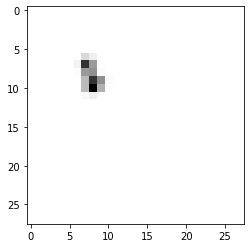

In [ ]:

image = img1.reshape(28,28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
#img3=img3/255   Not normalising the image 3

In [ ]:
img3=img3.reshape(1,28,28,1)
print(np.shape(img3))
import numpy as np
np.argmax(clf.predict(img3))

(1, 28, 28, 1)


3

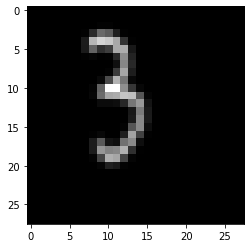

In [ ]:
image = img3.reshape(28,28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

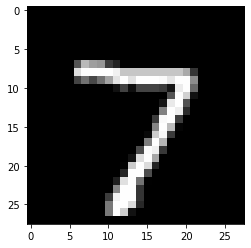

In [ ]:

image = x_test[0].reshape(28,28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
np.argmax(clf.predict(x_test[0].reshape(1,28,28,1)))

7

In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
#x_test[0]

In [ ]:
img_5 = io.imread("/content/drive/My Drive/Colab Notebooks/5.1.jpg",as_gray=True)
print(img_5)
img5 = resize(img_5, (28, 28))
np.shape(img_5)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(460, 819)

In [ ]:
img_5=img_5.reshape(1,28,28,1)
print(np.shape(img_5))
import numpy as np
np.argmax(clf.predict(img_5))

ValueError: ignored

In [ ]:
7/3

2.3333333333333335

In [ ]:
7//3

2